<a href="https://colab.research.google.com/github/rajivsresearch/housingbubble/blob/main/GTA_HPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# @title
import pandas as pd

hpi = pd.read_excel('GTA HPI.xlsx')

In [12]:
# @title
hpi.tail()

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark
228,2024-01-01,340.7,354.3,354.0,352.7,380.2,355.5,1065300,1276800,1070200,1341700,798000,665200
229,2024-02-01,349.6,365.6,364.2,364.3,386.9,357.7,1093200,1317500,1100900,1385900,812000,669300
230,2024-03-01,355.1,372.4,368.5,371.8,391.9,362.5,1110500,1342000,1114100,1414400,822500,678300
231,2024-04-01,359.2,377.3,375.2,376.4,394.5,367.1,1123300,1359900,1134300,1431900,828100,686800
232,2024-05-01,357.3,375.4,373.9,374.4,395.5,366.3,1117400,1352900,1130400,1424300,830200,685300


In [7]:
# @title
hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     233 non-null    datetime64[ns]
 1   Composite_HPI            233 non-null    float64       
 2   Single_Family_HPI        233 non-null    float64       
 3   One_Storey_HPI           233 non-null    float64       
 4   Two_Storey_HPI           233 non-null    float64       
 5   Townhouse_HPI            233 non-null    float64       
 6   Apartment_HPI            233 non-null    float64       
 7   Composite_Benchmark      233 non-null    int64         
 8   Single_Family_Benchmark  233 non-null    int64         
 9   One_Storey_Benchmark     233 non-null    int64         
 10  Two_Storey_Benchmark     233 non-null    int64         
 11  Townhouse_Benchmark      233 non-null    int64         
 12  Apartment_Benchmark      233 non-nul

<Axes: xlabel='Date'>

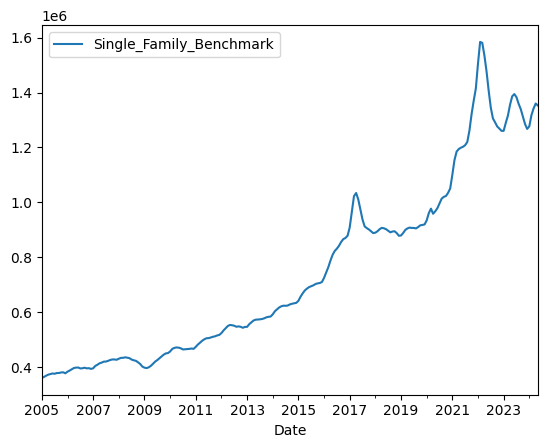

In [8]:
# @title
hpi.plot(x='Date', y='Single_Family_Benchmark')

In [9]:
# @title
cpi = pd.read_excel('CPI Monthly.xlsx')

In [13]:
# @title
cpi.tail()

,date,V41690973,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW
348,2024-01-01,158.3,159.3,2.9,3.3,3.2,3.3,2.4,3.1,3.7
349,2024-02-01,158.8,159.5,2.8,3.2,3.1,3.1,2.1,2.8,3.4
350,2024-03-01,159.8,159.9,2.9,3.1,2.8,2.9,2.0,2.9,3.3
351,2024-04-01,160.6,160.2,2.7,2.8,2.6,2.6,1.6,2.6,3.0
352,2024-05-01,161.5,160.7,2.9,2.9,2.8,2.4,1.8,2.8,3.4


In [15]:
# @title
cpi1 = cpi.loc[cpi['date'] >= '2005-01-01',['date', 'V41690973']]

In [18]:
# @title
df = pd.merge(hpi.loc[:,['Date', 'Single_Family_Benchmark']], cpi1, left_on='Date', right_on='date')

In [23]:
# @title
df = df.drop(labels=['date'], axis=1)

In [27]:
# @title
df = df.rename(columns={'V41690973':'CPI'})

In [33]:
# @title
df['Adjusted Single Family Benchmark'] = df['Single_Family_Benchmark']/df['CPI']*100

In [35]:
# @title
df.head()

,Date,Single_Family_Benchmark,CPI,CPIQ,Adjusted Single Family Benchmark
0,2005-01-01,360400,105.3,1.053,342260.208927
1,2005-02-01,364000,105.7,1.057,344370.860927
2,2005-03-01,368500,106.3,1.063,346660.395108
3,2005-04-01,372300,106.6,1.066,349249.530957
4,2005-05-01,374400,106.7,1.067,350890.346767


<Axes: xlabel='Date'>

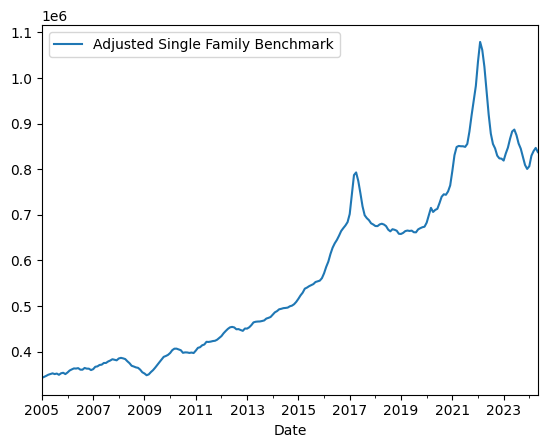

In [36]:
# @title
df.plot(x='Date', y='Adjusted Single Family Benchmark')

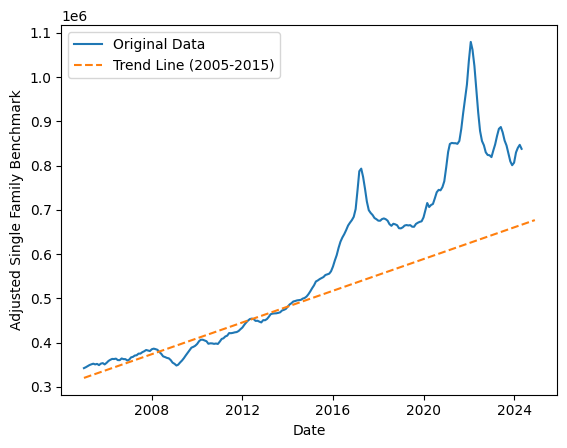

In [38]:
# @title
# prompt: plot a trend line in the chart using data from 2005 through 2015, extend trend line to 2024

import numpy as np
from sklearn.linear_model import LinearRegression

# Filter data for 2005-2015
df_filtered = df[(df['Date'] >= '2005-01-01') & (df['Date'] <= '2015-12-01')]

# Prepare data for linear regression
X = (df_filtered['Date'] - df_filtered['Date'].min()).dt.days.values.reshape(-1, 1)
y = df_filtered['Adjusted Single Family Benchmark'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for 2005-2024
X_pred = (pd.date_range('2005-01-01', '2024-12-01', freq='MS') - df_filtered['Date'].min()).days.values.reshape(-1, 1)
y_pred = model.predict(X_pred)

# Plot original data and trend line
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Adjusted Single Family Benchmark'], label='Original Data')
plt.plot(pd.date_range('2005-01-01', '2024-12-01', freq='MS'), y_pred, label='Trend Line (2005-2015)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Adjusted Single Family Benchmark')
plt.legend()
plt.show()


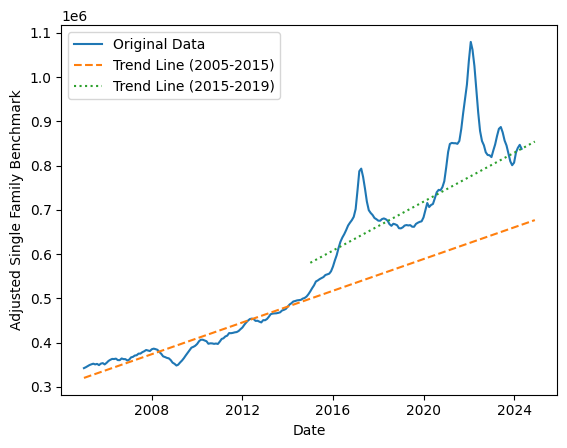

In [40]:
# @title
# prompt: plot a trend line in the chart using data from 2015 through 2019, extend trend line to 2024

# Filter data for 2015-2019
df_filtered_2 = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2019-12-01')]

# Prepare data for linear regression
X2 = (df_filtered_2['Date'] - df_filtered_2['Date'].min()).dt.days.values.reshape(-1, 1)
y2 = df_filtered_2['Adjusted Single Family Benchmark'].values

# Fit linear regression model
model2 = LinearRegression()
model2.fit(X2, y2)

# Predict values for 2015-2024
X_pred2 = (pd.date_range('2015-01-01', '2024-12-01', freq='MS') - df_filtered_2['Date'].min()).days.values.reshape(-1, 1)
y_pred2 = model2.predict(X_pred2)

# Plot original data, trend line 1, and trend line 2
plt.plot(df['Date'], df['Adjusted Single Family Benchmark'], label='Original Data')
plt.plot(pd.date_range('2005-01-01', '2024-12-01', freq='MS'), y_pred, label='Trend Line (2005-2015)', linestyle='dashed')
plt.plot(pd.date_range('2015-01-01', '2024-12-01', freq='MS'), y_pred2, label='Trend Line (2015-2019)', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Adjusted Single Family Benchmark')
plt.legend()
plt.show()
